In [1]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import dtale

In [2]:
df = pd.read_csv('log.csv', names=['selfish', 'num_agents','avg_health' ])

# df.head()

In [3]:
unselfish = df[df['selfish'] == 0.0]

unselfish.head()

selfish = pd.read_csv('log_2.csv', names=['num_agents','avg_health' ])

selfish['selfish'] = 1

selfish.head()

experiment_2 = [unselfish, selfish]

df1 = pd.concat(experiment_2)
df1['adjusted_fitness'] = (df1['num_agents'] * df1['avg_health']) / 20


([<matplotlib.axis.XTick at 0x117adcf40>,
 [Text(1, 0, 'unselfish'), Text(2, 0, 'selfish')])

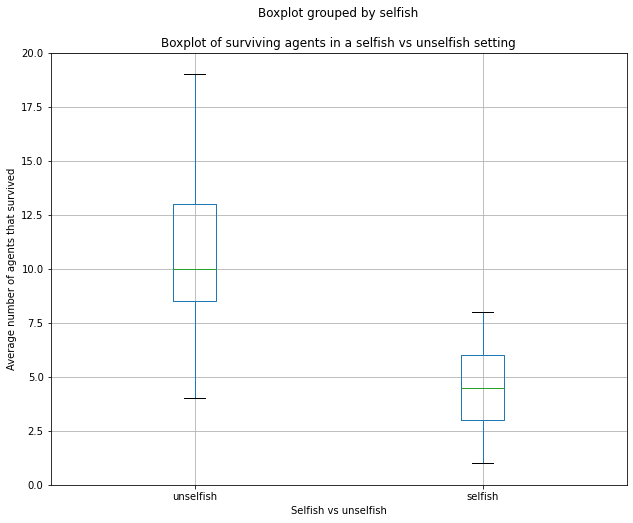

In [4]:
fig, ax = plt.subplots(figsize=(10,8))

df1.boxplot(column=['num_agents'], by='selfish', ax=ax)
ax.set_title("Boxplot of surviving agents in a selfish vs unselfish setting")
ax.set_xlabel("Selfish vs unselfish")
ax.set_ylabel("Average number of agents that survived")
plt.ylim(0, 20)
x = [1,2]
values = ['unselfish','selfish']

plt.xticks(x,values)

([<matplotlib.axis.XTick at 0x119ce5970>,
 [Text(1, 0, 'unselfish'), Text(2, 0, 'selfish')])

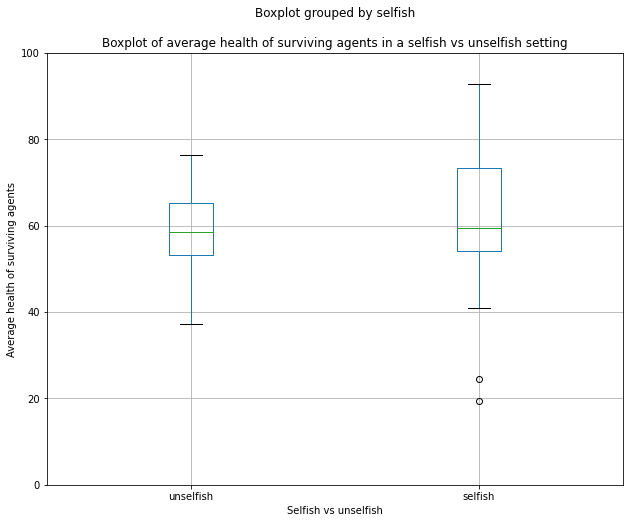

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

df1.boxplot(column=['avg_health'], by='selfish', ax=ax)
ax.set_title("Boxplot of average health of surviving agents in a selfish vs unselfish setting")
ax.set_xlabel("Selfish vs unselfish")
ax.set_ylabel("Average health of surviving agents")
plt.ylim(0, 100)
plt.xticks(x,values)

([<matplotlib.axis.XTick at 0x119d5beb0>,
 [Text(1, 0, 'unselfish'), Text(2, 0, 'selfish')])

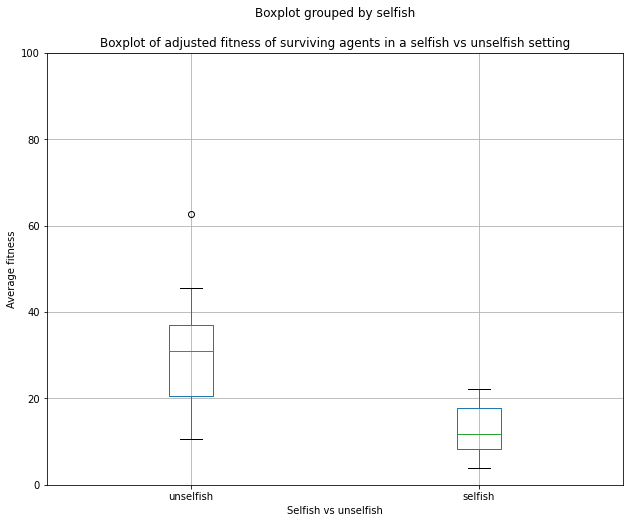

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

df1.boxplot(column=['adjusted_fitness'], by='selfish', ax=ax)
ax.set_title("Boxplot of adjusted fitness of surviving agents in a selfish vs unselfish setting")
ax.set_xlabel("Selfish vs unselfish")
ax.set_ylabel("Average fitness")
plt.ylim(0, 100)
plt.xticks(x,values)

In [23]:
df1.groupby(['selfish'])['adjusted_fitness'].describe()

,count,mean,std,min,25%,50%,75%,max
selfish,,,,,,,,
0.0,20.0,30.893173,12.400331,10.703194,20.505660,30.914097,36.974852,62.645278
1.0,20.0,12.643826,5.573616,3.838750,8.220764,11.741319,17.774063,22.072778


In [24]:
df1.groupby(['selfish'])['num_agents'].describe()

,count,mean,std,min,25%,50%,75%,max
selfish,,,,,,,,
0.0,20.0,10.60,3.81686,4.0,8.5,10.0,13.0,19.0
1.0,20.0,4.45,1.79106,1.0,3.0,4.5,6.0,8.0


In [7]:
import seaborn as sns

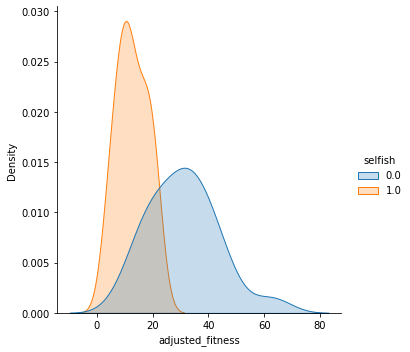

In [8]:
sns.displot(df1, x="adjusted_fitness", hue="selfish", kind="kde", fill=True)


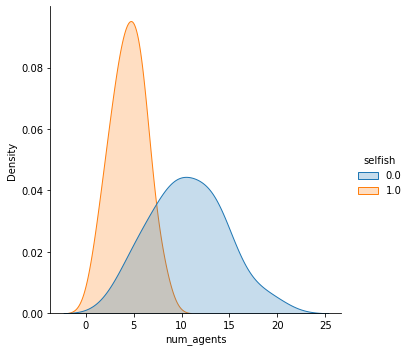

In [9]:
sns.displot(df1, x="num_agents", hue="selfish", kind="kde", fill=True)


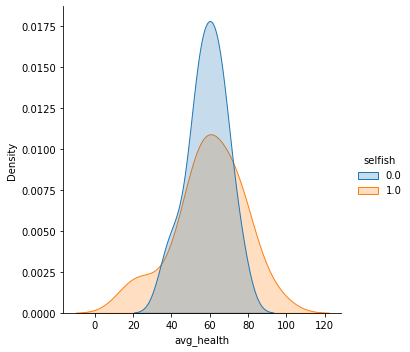

In [10]:
sns.displot(df1, x="avg_health", hue="selfish", kind="kde", fill=True)


In [11]:
from scipy.stats import ttest_ind
import numpy as np
df2 = df1[['selfish', 'num_agents']]
cooperative = df2[df2['selfish'] == 0]
selfish = df2[df2['selfish'] == 1]
cooperative = cooperative['num_agents']
selfish = selfish['num_agents']

In [12]:
cooperative_mean = np.mean(cooperative)
selfish_mean = np.mean(selfish)

cooperative_std = np.std(cooperative)
selfish_std = np.std(selfish)

In [13]:
ttest,pval = ttest_ind(cooperative,selfish, equal_var=False)
print("p-value",pval)

p-value 5.413240530632923e-07


In [14]:
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we reject null hypothesis


In [15]:
np.var(cooperative)

13.840000000000003

In [16]:
np.var(selfish)

3.0475000000000003